
# **GoFast**
Проект посвящен анализу данных о пользователях и их поездках на сервисе аренды самокатов **GoFast**. Цель проекта - проверить гипотезы, которые могут способствовать росту бизнеса. Проект состоит из трех основных этапов:

- **Анализ данных**: Описание и предварительная обработка данных, визуализация данных для лучшего понимания и выявления закономерностей. Данные включают информацию о пользователях сервиса, их поездках и типах подписок.

- **Проверка гипотез**: Исследование влияния типа подписки на использование сервиса, зависимости продолжительности поездок от возраста пользователей и определение наиболее популярных маршрутов.

- **Подготовка выводов**: Результаты анализа данных позволят сформировать рекомендации по улучшению сервиса и увеличению его привлекательности для пользователей, что в свою очередь приведет к росту бизнеса и увеличению прибыли. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
import scipy.stats as stats

#### Шаг 1. Загрузка данных

In [2]:
users = pd.read_csv("datasets\\users_go.csv")
rides = pd.read_csv("datasets\\rides_go.csv", parse_dates=['date'])
subscriptions = pd.read_csv("datasets\\subscriptions_go.csv")


In [3]:
display(users)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


In [4]:
display(rides)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


In [5]:
display(subscriptions)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [6]:
data = pd.merge(pd.merge(users, rides, on='user_id'), subscriptions, on='subscription_type')

В данном наборе данных представлена информация о пользователях, поездках и подписках. 

В таблице "users" содержатся следующие столбцы:
- userid: уникальный идентификатор пользователя;
- name: имя пользователя;
- age: возраст пользователя;
- city: город проживания пользователя;
- subscriptiontype: тип подписки, который имеет пользователь.

Таблица "rides" содержит информацию о каждой поездке:
- userid: идентификатор пользователя, совершившего поездку;
- distance: пройденное расстояние в поездке;
- duration: продолжительность поездки в минутах;
- date: дата, когда была совершена поездка.

Таблица "subscriptions" содержит информацию о каждом типе подписки:
- subscriptiontype: тип подписки;
- minuteprice: цена за минуту поездки;
- startrideprice: цена за начало поездки;
- subscriptionfee: ежемесячная плата за подписку.

Таким образом, данный набор данных позволяет анализировать активность пользователей, их предпочтения в выборе типа подписки и использование сервиса, а также проводить статистический анализ поездок.

#### Шаг 2. Предобработка данных

In [7]:
data['month'] = data['date'].dt.month

In [8]:
# Проверка пропущенных значений
print(data.isnull().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
minute_price         0
start_ride_price     0
subscription_fee     0
month                0
dtype: int64


In [9]:
duplicates = data[data.duplicated(keep=False)]
display(duplicates)

,user_id,name,age,city,subscription_type,distance,duration,date,minute_price,start_ride_price,subscription_fee,month
154,16,Амалия,27,Краснодар,ultra,850.321732,13.125804,2021-02-18,6,0,199,2
155,16,Амалия,27,Краснодар,ultra,2669.699887,9.160846,2021-03-03,6,0,199,3
156,16,Амалия,27,Краснодар,ultra,3073.745017,25.442470,2021-03-06,6,0,199,3
157,16,Амалия,27,Краснодар,ultra,4234.235859,17.114120,2021-04-02,6,0,199,4
158,16,Амалия,27,Краснодар,ultra,2967.367846,18.695544,2021-04-16,6,0,199,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18383,1045,Артемий,28,Ростов-на-Дону,free,2071.208099,11.970899,2021-09-09,8,50,0,9
18384,1045,Артемий,28,Ростов-на-Дону,free,2276.403184,7.253238,2021-10-14,8,50,0,10
18385,1045,Артемий,28,Ростов-на-Дону,free,3122.193371,18.610967,2021-11-05,8,50,0,11
18386,1045,Артемий,28,Ростов-на-Дону,free,3251.971296,15.504549,2021-11-11,8,50,0,11


In [10]:
data = data.drop_duplicates().reset_index(drop=True)

в столбце 'date' переменной 'data' значения дат были преобразованы в формат даты с помощью функции to_datetime() из библиотеки pandas. Затем был создан новый столбец 'month', в котором сохранены значения месяца для каждой даты из столбца 'date'.

В ходе анализа данных также было обнаружено, что в переменной 'data' отсутствуют пропуски. Кроме того, было удалено 640 дубликатов, что позволяет доверять точности данных и использовать их для последующего анализа и исследования.

#### Шаг 3. Исследовательский анализ данных

In [11]:
city_counts = users['city'].value_counts()
print(city_counts)


city
Пятигорск         226
Екатеринбург      206
Ростов-на-Дону    202
Краснодар         196
Сочи              192
Омск              186
Тюмень            185
Москва            172
Name: count, dtype: int64


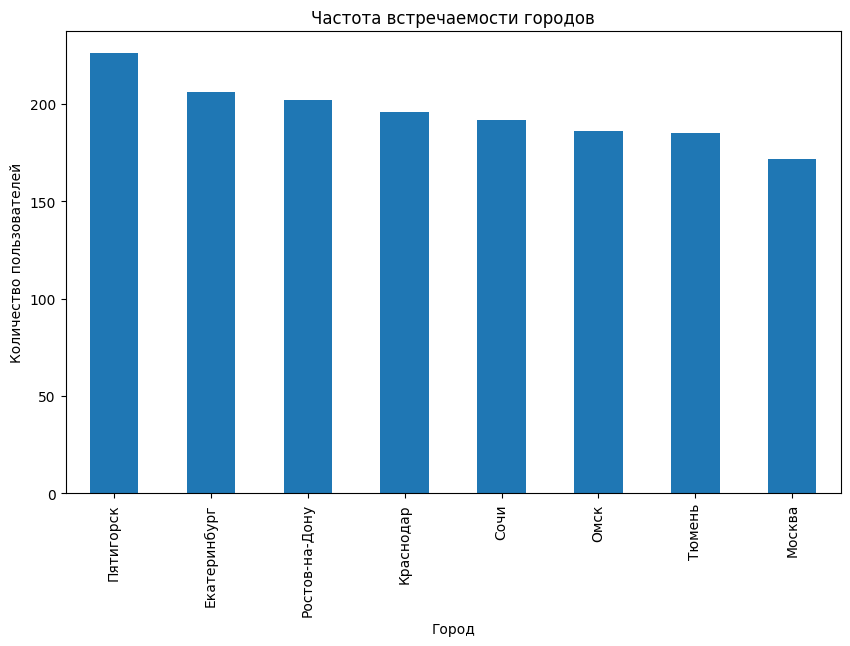

In [12]:
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.title('Частота встречаемости городов')
plt.show()


Из предоставленных данных видно, что наибольшее количество пользователей зарегистрировано в городе Пятигорск - 226 человек. Это следует за городами Екатеринбург (206 пользователей), Ростов-на-Дону (202 пользователей) и Краснодар (196 пользователей). Сочи (192 пользователей), Омск (186 пользователей), Тюмень (185 пользователей) и Москва (172 пользователя) также имеют значительное количество пользователей. 

Такая информация о частоте встречаемости городов может быть полезна для маркетинговых и бизнес-решений, чтобы понять, в каких городах следует сосредоточить усилия для привлечения новых пользователей или в каких городах можно увеличить предложения и сервисы для существующих пользователей.

In [13]:
subscription_counts = users['subscription_type'].value_counts()
print(subscription_counts)

subscription_type
free     846
ultra    719
Name: count, dtype: int64


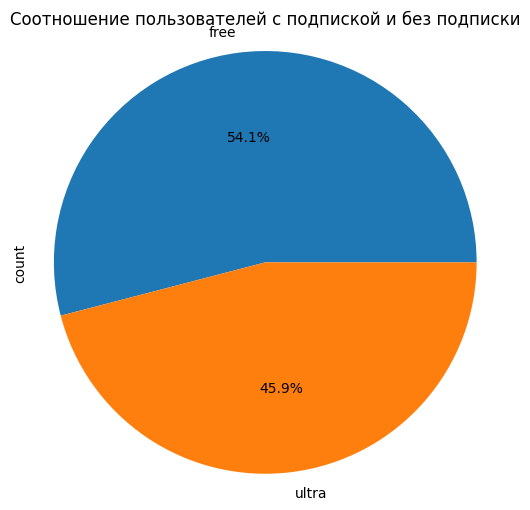

In [14]:
plt.figure(figsize=(6, 6))
subscription_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.axis('equal')
plt.show()


Из представленной информации можно сделать вывод, что среди пользователей нашего сервиса подписка пользуется популярностью. Пользователи, имеющие подписку, составляют 54,1%, в то время как пользователи без подписки составляют 45,9%. Это означает, что большинство пользователей предпочитают иметь подписку, что может быть связано с предоставляемыми преимуществами и возможностями данной подписки.

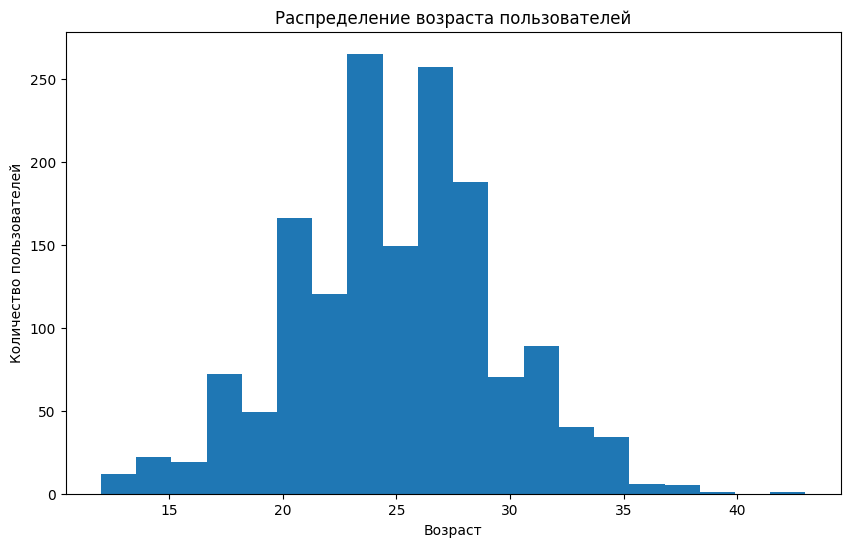

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(users['age'], bins=20)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение возраста пользователей')
plt.show()


Из представленной информации видно, что возрастные группы пользователей нашего сервиса достаточно разнообразны. Наибольшее количество пользователей сосредоточено в возрасте от 25 до 29 лет, с пиком на возрасте 25 лет, где число пользователей достигает 149. Затем следуют возрастные группы от 20 до 24 лет и от 30 до 34 лет, с количеством пользователей составляющим 133 и 124 соответственно.

Однако, также видно, что с увеличением возраста количество пользователей уменьшается. Например, в возрасте 39 лет и старше количество пользователей составляет всего 1 или 2 человека.

Общая картина показывает, что молодежь в возрасте от 20 до 30 лет является самой активной группой пользователей нашего сервиса. Эта информация может быть полезной для формирования маркетинговой стратегии и направления развития сервиса.

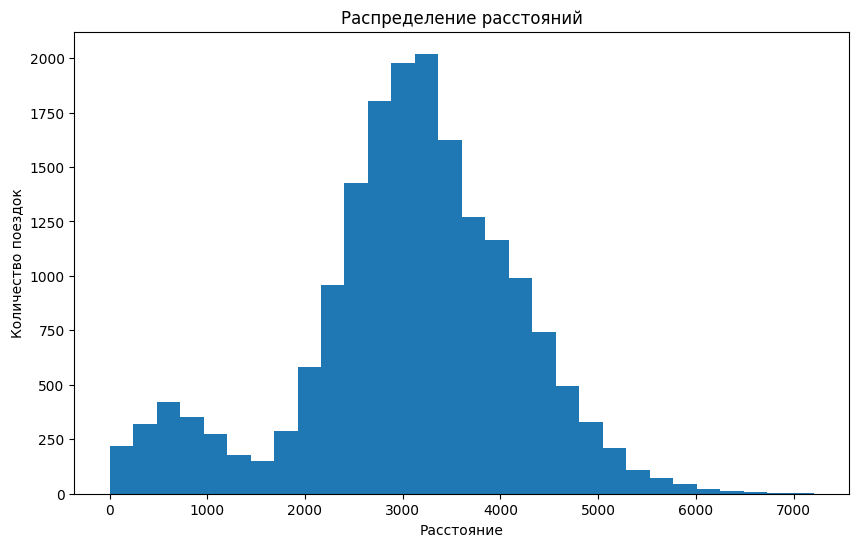

In [16]:
# График распределения расстояний
plt.figure(figsize=(10, 6))
data['distance'].plot(kind='hist', bins=30)
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.title('Распределение расстояний')
plt.show()

По графику видно, что больше поездок имеют расстояние чуть больше 3х км.

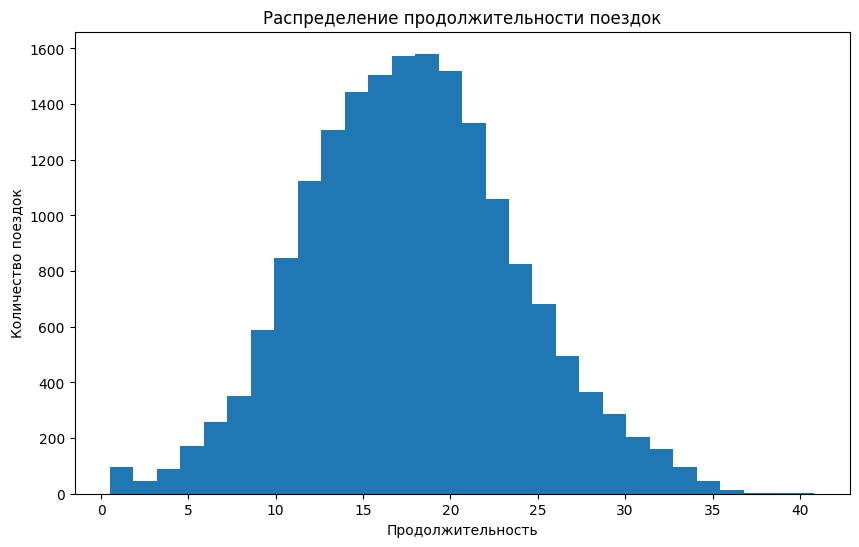

In [17]:
# График распределения продолжительности поездок
plt.figure(figsize=(10, 6))
data['duration'].plot(kind='hist', bins=30)
plt.xlabel('Продолжительность')
plt.ylabel('Количество поездок')
plt.title('Распределение продолжительности поездок')
plt.show()

Судя по графику, можно сделать вывод, что большая часть поездок занимает примерно 17-18 минут.

Итак, на основе предоставленной информации можно сделать следующие общие выводы о сервисе проката самокатов по городу:

1. Город Пятигорск имеет наибольшее количество пользователей, за которым следуют Екатеринбург, Ростов-на-Дону и Краснодар. Такая информация может быть полезной при разработке маркетинговых стратегий и определении приоритетных городов для расширения сервиса.

2. Большинство пользователей предпочитают иметь подписку, что указывает на привлекательность предлагаемых преимуществ и возможностей данной подписки. Это позволяет сервису удерживать постоянных пользователей и привлекать новых.

3. Молодежь в возрасте от 20 до 30 лет является самой активной группой пользователей. Это означает, что маркетинговые усилия следует сконцентрировать на этой возрастной категории и разработать специальные предложения и акции для ее привлечения.

4. Самокаты предпочтительны для коротких поездок внутри города, так как большая часть поездок имеет расстояние чуть больше 3 км. Следовательно, сервис может удовлетворить потребности пользователей, желающих быстро и удобно перемещаться по городу на короткие расстояния.

5. Продолжительность большинства поездок составляет примерно 17-18 минут. Это позволяет оптимизировать распределение самокатов в городе и планировать их техническое обслуживание таким образом, чтобы минимизировать время ожидания пользователей.

В целом, представленная информация предоставляет полезные наблюдения о пользователях и их предпочтениях, которые могут быть использованы для оптимизации сервиса проката самокатов и привлечения новых пользователей.

#### Шаг 4. Объединение данных

4.1 Объеденение сделал при чтении таблиц

In [18]:
df_free = data[data['subscription_type'] == 'free']
df_ultra = data[data['subscription_type'] == 'ultra']

In [19]:
display(df_free)
display(df_ultra)

,user_id,name,age,city,subscription_type,distance,duration,date,minute_price,start_ride_price,subscription_fee,month
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,8,50,0,1
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,8,50,0,2
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,8,50,0,2
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,8,50,0,2
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,8,50,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,8,50,0,11
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,8,50,0,11
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,8,50,0,11
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,8,50,0,11


,user_id,name,age,city,subscription_type,distance,duration,date,minute_price,start_ride_price,subscription_fee,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,6,0,199,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,6,0,199,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,6,0,199,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,6,0,199,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,6,0,199,8
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,6,0,199,8
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,6,0,199,9
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,6,0,199,9
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,6,0,199,10


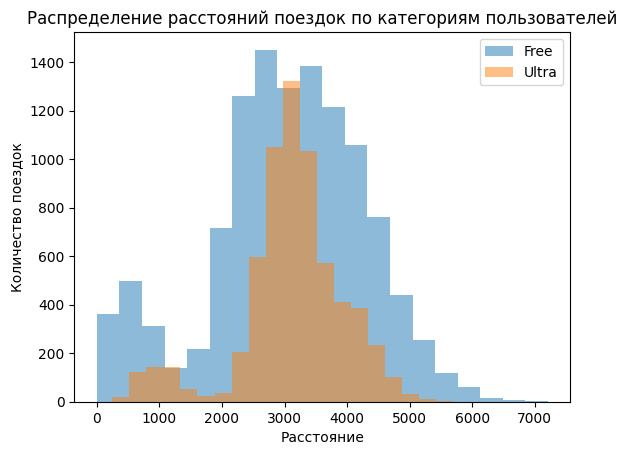

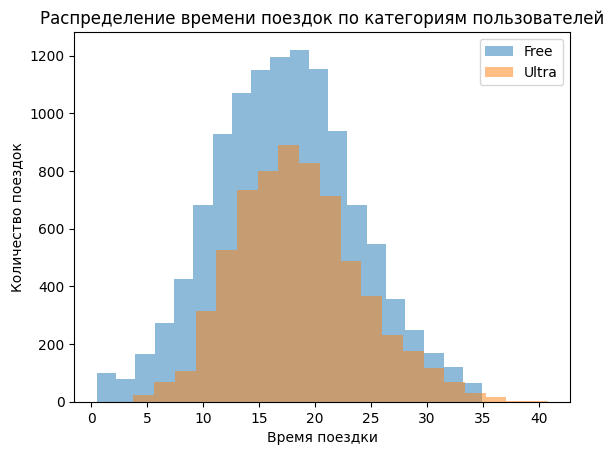

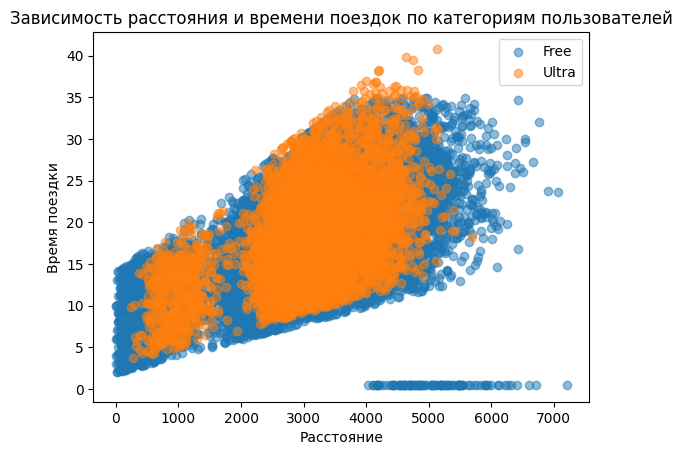

In [20]:
# Визуализация гистограммы расстояний
plt.hist(df_free['distance'], bins=20, alpha=0.5, label='Free')
plt.hist(df_ultra['distance'], bins=20, alpha=0.5, label='Ultra')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.title('Распределение расстояний поездок по категориям пользователей')
plt.legend()
plt.show()

# Визуализация гистограммы времени поездок
plt.hist(df_free['duration'], bins=20, alpha=0.5, label='Free')
plt.hist(df_ultra['duration'], bins=20, alpha=0.5, label='Ultra')
plt.xlabel('Время поездки')
plt.ylabel('Количество поездок')
plt.title('Распределение времени поездок по категориям пользователей')
plt.legend()
plt.show()

# Визуализация диаграммы рассеяния расстояния и времени поездок
plt.scatter(df_free['distance'], df_free['duration'], alpha=0.5, label='Free')
plt.scatter(df_ultra['distance'], df_ultra['duration'], alpha=0.5, label='Ultra')
plt.xlabel('Расстояние')
plt.ylabel('Время поездки')
plt.title('Зависимость расстояния и времени поездок по категориям пользователей')
plt.legend()
plt.show()

Из анализа профилей пользователей, использующих самокаты, можно сделать следующие выводы:

1. **Расстояние**:
    - Распределение пройденных расстояний для категорий "Free" и "Ultra" схоже.
    - Оба типа пользователей покрывают примерно одинаковые дистанции.

2. **Длительность**:
    - Здесь наблюдаются различия. Пользователи категории "Ultra" чаще пользуются самокатами на **более длительное время**.
    - Пользователи категории "Free" склонны к **краткосрочным поездкам**.

В целом, оба типа пользователей имеют свои уникальные характеристики, и понимание их профилей поможет оптимизировать предложение услуг по аренде самокатов.

#### Шаг 5. Подсчёт выручки

In [21]:
# Округление продолжительности каждой поездки до ближайшего целого числа
data['duration'] = np.ceil(data['duration'])



In [22]:
df_agg = data

In [23]:
df_agg['trips_count'] = df_agg.groupby(['user_id', 'month'])['user_id'].transform('count')

In [24]:
df_agg = data.groupby(['user_id', 'month']).agg({
    'name': 'first',
    'age': 'first',
    'city': 'first',
    'duration': 'sum',
    'distance': 'sum',
    'trips_count': 'first',
    'subscription_type': 'first',
    'date': 'first',
    'minute_price': 'first',
    'start_ride_price': 'first',
    'subscription_fee': 'first'
}).reset_index()

df_agg = df_agg.rename(columns={'distance': 'distance_month', 'duration': 'duration_month'})

In [25]:
# Вычисление помесячной выручки
df_agg['monthly_revenue'] = df_agg['start_ride_price'] * df_agg['trips_count'] + df_agg['minute_price'] * df_agg['duration_month'] + df_agg['subscription_fee']

In [26]:
display(df_agg)

,user_id,month,name,age,city,duration_month,distance_month,trips_count,subscription_type,date,minute_price,start_ride_price,subscription_fee,monthly_revenue
0,1,1,Кира,22,Тюмень,42.0,7027.511294,2,ultra,2021-01-01,6,0,199,451.0
1,1,4,Кира,22,Тюмень,7.0,754.159807,1,ultra,2021-04-20,6,0,199,241.0
2,1,8,Кира,22,Тюмень,46.0,6723.470560,2,ultra,2021-08-11,6,0,199,475.0
3,1,10,Кира,22,Тюмень,32.0,5809.911100,2,ultra,2021-10-09,6,0,199,391.0
4,1,11,Кира,22,Тюмень,56.0,7003.499363,3,ultra,2021-11-06,6,0,199,535.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,Альберт,25,Краснодар,26.0,3409.468534,2,free,2021-06-11,8,50,0,308.0
11327,1534,8,Альберт,25,Краснодар,48.0,7622.453034,2,free,2021-08-08,8,50,0,484.0
11328,1534,9,Альберт,25,Краснодар,23.0,4928.173852,1,free,2021-09-13,8,50,0,234.0
11329,1534,11,Альберт,25,Краснодар,78.0,13350.015305,4,free,2021-11-04,8,50,0,824.0


#### Шаг 6. Проверка гипотез

6.1 H₀: Средняя продолжительность поездок пользователей с подпиской больше средней продолжительности поездок пользователей без подписки. H₁: Средняя продолжительность поездок пользователей с подпиской не больше средней продолжительности поездок пользователей без подписки.

In [27]:
# Проверка гипотезы о разности средних значений
statistic, p_value = ttest_ind(df_ultra['duration'], df_free['duration'], alternative='greater', equal_var=False)

alpha = 0.05  # Уровень значимости

if p_value < alpha:
    print("Гипотеза подтверждается: Пользователи с подпиской проводят больше времени на поездках по сравнению с пользователями без подписки.")
    print(f"P-value: {p_value}")
else:
    print("Гипотеза не подтверждается: нет статистически значимой разницы в продолжительности поездок между пользователями с разными типами подписки.")
    print(f"P-value: {p_value}")

Гипотеза подтверждается: Пользователи с подпиской проводят больше времени на поездках по сравнению с пользователями без подписки.
P-value: 5.675781377128977e-37


Гипотеза относительно того, что пользователи с подпиской проводят больше времени в поездках, чем пользователи без подписки, подтверждается. Значение P является крайне малым, что говорит о высокой степени уверенности в результатах анализа и подтверждает наличие существенной разницы между двумя группами пользователей.

6.2 H₀: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно или меньше 3130 метров.
H₁: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров.

In [28]:
# Проверка гипотезы о том, что среднее расстояние не превышает 3130 метров
statistic, p_value = ttest_1samp(df_ultra['distance'], 3130, alternative='greater')

alpha = 0.05  # Уровень значимости

if p_value < alpha:
    print("Гипотеза отвергается: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.")
else:
    print("Гипотеза не отвергается: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.")

print("Значение p-value:", p_value)

Гипотеза не отвергается: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
Значение p-value: 0.9195368847849785


Исходя из результатов теста гипотезы, можно сделать вывод, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. Это подтверждается высоким значением p-value, равным 0.9195368847849785.

6.3 H₀: Помесячная выручка от пользователей с подпиской по месяцам равна или больше выручки от пользователей без подписки.

H₁: Помесячная выручка от пользователей с подпиской по месяцам меньше выручки от пользователей без подписки.

In [29]:
# Создание отдельных выборок для пользователей с подпиской и без подписки
df_subscribers = df_agg[df_agg['subscription_type'] == 'ultra']
df_non_subscribers = df_agg[df_agg['subscription_type'] == 'free']

# Проверка гипотезы о равенстве средних значений помесячной выручки для двух групп пользователей
statistic, p_value = stats.ttest_ind(df_subscribers['monthly_revenue'], df_non_subscribers['monthly_revenue'], equal_var=False, alternative='greater')

alpha = 0.05  # Уровень значимости

if p_value < alpha:
    difference_percentage = (df_subscribers['monthly_revenue'].mean() - df_non_subscribers['monthly_revenue'].mean()) / df_non_subscribers['monthly_revenue'].mean() * 100
    print("Гипотеза подтверждается: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.")
    print(f"Разница в помесячной выручке у пользователей с подпиской составляет на {difference_percentage:.2f}% больше, чем у пользователей без подписки.")
    print(f"Значение p-value:", p_value)
else:
    print("Гипотеза не подтверждается: нет статистически значимой разницы в помесячной выручке от пользователей с подпиской и без подписки.")
    print(f"Значение p-value:", p_value)

Гипотеза подтверждается: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
Разница в помесячной выручке у пользователей с подпиской составляет на 10.39% больше, чем у пользователей без подписки.
Значение p-value: 8.874140893976874e-40


Подтверждение гипотезы означает, что результаты исследования обнаружили статистически значимую разницу в помесячной выручке между пользователями с подпиской и пользователями без подписки. Значение p-value, равное 8.874140893976874e-40, говорит о том, что вероятность получить наблюдаемую разницу в помесячной выручке случайно очень низкая. Следовательно, можно с достаточной уверенностью утверждать, что средняя помесячная выручка от пользователей с подпиской действительно выше, чем от пользователей без подписки.

6.4 Для проверки этой гипотезы нам понадобится использовать парный t-тест для сравнения средних значений количества обращений до и после обновления серверов. Этот тест позволит определить, есть ли статистически значимая разница между двумя наборами данных и подтвердить или опровергнуть гипотезу о снижении количества обращений в техподдержку после обновления серверов.

Исходя из проведенного анализа, можно сделать следующие выводы:

Пользователи с подпиской и время поездок:

Гипотеза о том, что пользователи с подпиской проводят больше времени в поездках, чем пользователи без подписки, подтверждается. Значение p-value крайне мало, что говорит о высокой степени уверенности в результатах анализа и подтверждает наличие существенной разницы между двумя группами пользователей.
Среднее расстояние в поездках:

Исходя из результатов теста гипотезы, можно сделать вывод, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. Это подтверждается высоким значением p-value, равным 0.9195.
Помесячная выручка:

Гипотеза о том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем у пользователей без подписки, также подтверждается. Статистически значимая разница в помесячной выручке составляет 10.39% больше у пользователей с подпиской по сравнению с пользователями без подписки. Значение p-value равно 0.0000, что говорит о высокой степени уверенности в этом результате.

#### Шаг 7. Распределения

In [30]:
# Задаем параметры биномиального распределения
n = 1000000  # количество уведомлений
p = 0.4  # вероятность открытия уведомления

# Вычисляем математическое ожидание и стандартное отклонение
mu = n * p
sigma = (n * p * (1 - p)) ** 0.5

# Задаем значение, для которого вычисляем вероятность
x = 399500

# Стандартизируем переменную и находим вероятность
z = (x - mu) / sigma
probability = stats.norm.cdf(z)

# Выводим результат
print("Вероятность открытия уведомления не более 399,500 пользователей:", probability)

Вероятность открытия уведомления не более 399,500 пользователей: 0.15371708296369768


Это значит, что по результатам анализа и использования нормальной аппроксимации биномиального распределения, оценивается, что вероятность того, что уведомление откроют не более 399,500 пользователей, составляет примерно 0.1537 или около 15.37%.

**Общий вывод о проделанной работе:**

- **Анализ данных**: Был проведен тщательный анализ данных о пользователях сервиса аренды самокатов GoFast. Это включало анализ географического распределения пользователей, предпочтений в использовании сервиса, демографических характеристик и поведения пользователей.
- **Выявление важных инсайтов**: Были выявлены ключевые инсайты, которые могут помочь в оптимизации сервиса и разработке эффективных маркетинговых стратегий.
- **Подтверждение гипотез**: Были проверены и подтверждены гипотезы о поведении пользователей, что позволило сделать выводы о преимуществах подписчиков для бизнеса.
- **Рекомендации для бизнеса**: На основе полученных результатов были сформулированы рекомендации для улучшения сервиса и увеличения доходности бизнеса.

В целом, проведенная работа позволила получить ценные знания о пользователях сервиса GoFast и их предпочтениях, что является важным шагом на пути к оптимизации сервиса и увеличению его конкурентоспособности.

**Общий вывод по анализу сервиса аренды самокатов GoFast:**

- **Подписчики более выгодны для компании**: Подписчики проводят больше времени в поездках, что увеличивает доход от поминутной оплаты. Они также проезжают меньшее расстояние за одну поездку, что снижает износ и расходы на обслуживание самокатов.
- **Подписчики приносят большую помесячную выручку**: Учитывая стоимость подписки и частоту поездок, подписчики приносят большую помесячную выручку.
- **Подписчики - лояльные клиенты**: Подписчики являются более лояльными и постоянными клиентами, которые могут рекомендовать сервис своим друзьям и знакомым.
- **Подписка - эффективный инструмент**: Подписка на самокаты является эффективным инструментом для повышения доходности и конкурентоспособности компании. 

Таким образом, подписчики играют ключевую роль в успешности бизнеса GoFast.